In [13]:
import torchray
import loadmodel as lm
import numpy as np
import xml.etree.ElementTree as ET
import cv2
import time
import torch
from torch.autograd import Variable
from torchvision import models
import sys
import numpy as np
import torchvision.datasets as datasets
import glob
import torchray.benchmark
from matplotlib import pyplot as plt
import torchray.benchmark.pointing_game
import os
import torchvision.transforms as transforms
import miscel
import torchray.benchmark.pointing_game
from numpy import savetxt
import exp
from lime import lime_image

import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn.functional as F

# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224))])    
# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/Dataa/rnddata/valid',transform = val_transforms)

model = lm.loadResnet()

In [14]:
def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf  
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.CenterCrop(224)
    ])    

    return transf

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

vv= 1483
img, labels = vall[vv]
def batch_predict(images):
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()


In [15]:
explainer = lime_image.LimeImageExplainer()
st = time.time()
explanation = explainer.explain_instance(np.array(pill_transf(img)), 
                                         batch_predict, # classification function
                                         labels = labels,  
                                         num_samples=1000)
temp, mask = explanation.get_image_and_mask(label=labels, positive_only=False, num_features=5, negative_only=False, hide_rest=False)
end = time.time()
vs = end - st
print(vs)


5.992886304855347


In [19]:
mask.min()

-1

In [22]:
mask.shape

(224, 224)

In [18]:
np.array(explanation)

array(<lime.lime_image.ImageExplanation object at 0x7f2cf2121890>,
      dtype=object)

In [7]:
temp.shape

(224, 224, 3)

In [8]:
type(mask)

numpy.ndarray

In [9]:
plt.imshow(temp)

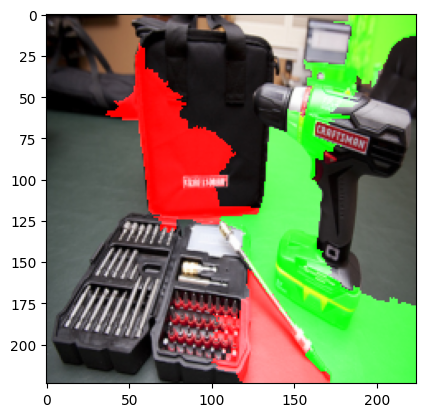

In [10]:
plt.show()

In [11]:
mask.min()

0

In [12]:
mask.max()

1

In [25]:
mask[50, 0]

0

In [11]:
plt.imshow(mask)

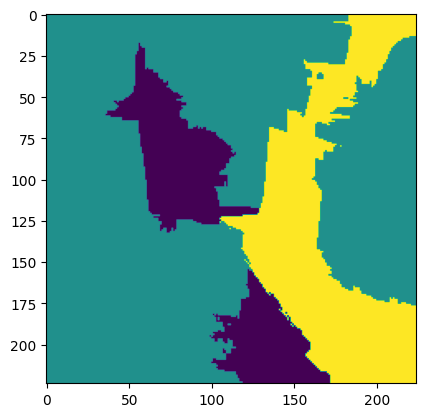

In [12]:
plt.show()